In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
data_train = pd.read_csv('train.csv')

In [44]:
data_train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

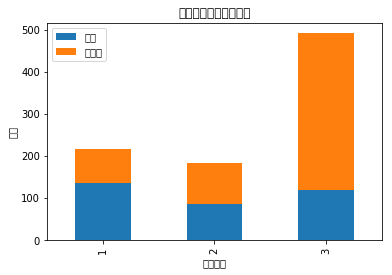

In [60]:
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()


In [47]:
getattr(data_train, 'Pclass').value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [87]:
from sklearn.ensemble import RandomForestRegressor

def recover_data(df, input_attr, missing_attr, method='RandomForest'):
    """
    :param df: input dataframe
    :param input_attr: type -> list:
    :param missing_attr: str: attrb need to be recover
    :param method: which method choose to recover data -> 'RandomForest', 'Xgboost', 'lightgbm'
    :return: df
    """
    attrb_df = df[[missing_attr] + input_attr]
    train = attrb_df[getattr(attrb_df, missing_attr).notnull()].as_matrix()
    test = attrb_df[getattr(attrb_df, missing_attr).isnull()].as_matrix()

    train_label = train[:, 0]
    train_data = train[:, 1:]

    if method == 'RandomForest':
        model = RandomForestRegressor(random_state=1, n_estimators=2000, n_jobs=-1)
        model.fit(train_data, train_label)
        predict_result = model.predict(test[:, 1:])
        df.loc[(getattr(df, missing_attr).isnull()), missing_attr] = predict_result

    return df

In [96]:
df = recover_data(data_train, ['Fare', 'Parch', 'SibSp', 'Pclass'], 'Age')

/Users/likairu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/likairu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [93]:
df.Age.null()

AttributeError: 'Series' object has no attribute 'null'